<a href="https://colab.research.google.com/github/ashwantmanikoth/ML_WorkFlow/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Create your own python notebook from code examples that downloads and imports the MNIST dataset.**

In [110]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Required libraries

In [12]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing import image
import numpy as np
import os
from PIL import Image
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt



## Load MNIST DATA

In [152]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = np.concatenate((x_train, x_test), axis=0)
y_train = np.concatenate((y_train, y_test), axis=0)

# **2.Create a model by constructing your own selection of layers.**


In [153]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

model.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 784)               0         
                                                                 
 dense_36 (Dense)            (None, 128)               100480    
                                                                 
 dropout_16 (Dropout)        (None, 128)               0         
                                                                 
 dense_37 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# **3.Train the model on the MNIST dataset for at least 10 epochs.**


In [154]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, validation_split=0.2)


Epoch 1/20
1750/1750 [==============================] - 8s 4ms/step - loss: 2.5703 - accuracy: 0.7615 - val_loss: 0.4697 - val_accuracy: 0.8915
Epoch 2/20
1750/1750 [==============================] - 6s 4ms/step - loss: 0.5848 - accuracy: 0.8506 - val_loss: 0.3391 - val_accuracy: 0.9166
Epoch 3/20
1750/1750 [==============================] - 7s 4ms/step - loss: 0.4654 - accuracy: 0.8767 - val_loss: 0.2980 - val_accuracy: 0.9337
Epoch 4/20
1750/1750 [==============================] - 7s 4ms/step - loss: 0.4174 - accuracy: 0.8888 - val_loss: 0.2958 - val_accuracy: 0.9312
Epoch 5/20
1750/1750 [==============================] - 7s 4ms/step - loss: 0.3880 - accuracy: 0.8983 - val_loss: 0.2686 - val_accuracy: 0.9330
Epoch 6/20
1750/1750 [==============================] - 9s 5ms/step - loss: 0.3746 - accuracy: 0.9040 - val_loss: 0.2742 - val_accuracy: 0.9386
Epoch 7/20
1750/1750 [==============================] - 8s 5ms/step - loss: 0.3608 - accuracy: 0.9103 - val_loss: 0.2420 - val_accuracy:

# **4.Capture the training history and plot the training and validation accuracy curves.**


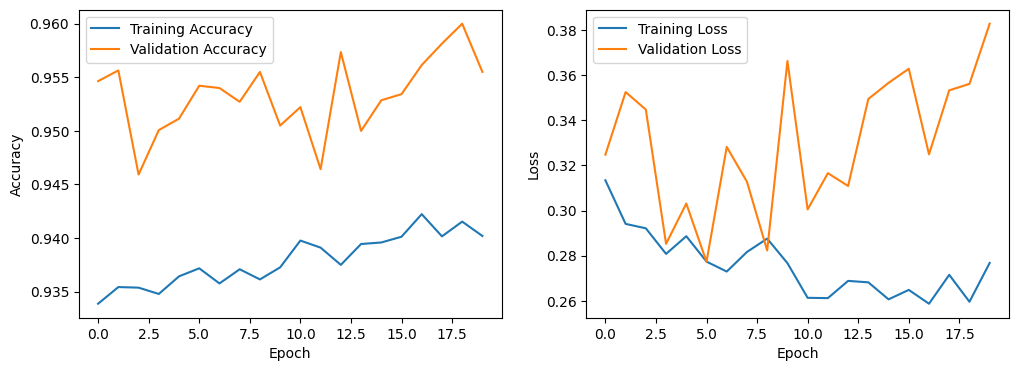

In [151]:
#Ploting Model with configuration 1
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


# 5.Train the model again for a sufficient amount of epoch that you can start to see overfitting.
## Configuration #2 with additional Dense Layer

In [119]:
model_2 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),  # Additional Dense layer
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_2 = model_2.fit(x_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/10
2188/2188 [==============================] - 12s 5ms/step - loss: 1.5222 - accuracy: 0.7252 - val_loss: 0.4168 - val_accuracy: 0.8958
Epoch 2/10
2188/2188 [==============================] - 17s 8ms/step - loss: 0.5213 - accuracy: 0.8578 - val_loss: 0.2404 - val_accuracy: 0.9347
Epoch 3/10
2188/2188 [==============================] - 11s 5ms/step - loss: 0.3718 - accuracy: 0.8961 - val_loss: 0.2209 - val_accuracy: 0.9400
Epoch 4/10
2188/2188 [==============================] - 8s 4ms/step - loss: 0.3050 - accuracy: 0.9146 - val_loss: 0.1361 - val_accuracy: 0.9603
Epoch 5/10
2188/2188 [==============================] - 10s 5ms/step - loss: 0.2446 - accuracy: 0.9320 - val_loss: 0.1983 - val_accuracy: 0.9455
Epoch 6/10
2188/2188 [==============================] - 10s 5ms/step - loss: 0.2222 - accuracy: 0.9375 - val_loss: 0.1142 - val_accuracy: 0.9679
Epoch 7/10
2188/2188 [==============================] - 8s 4ms/step - loss: 0.2015 - accuracy: 0.9439 - val_loss: 0.1065 - val_accu

AttributeError: ignored

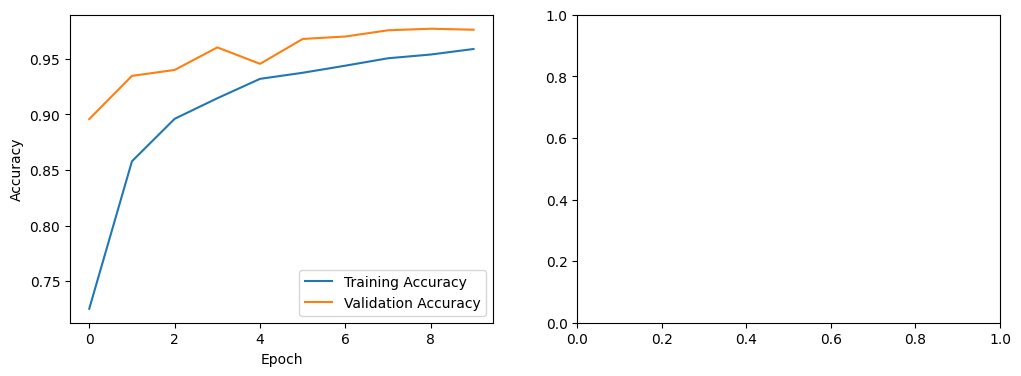

In [121]:
# plot_history([('model_2', history_2)], key='accuracy')
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Configuration #3 with adifferent Optimizer

Epoch 1/50
2188/2188 [==============================] - 8s 3ms/step - loss: 15.6660 - accuracy: 0.1729 - val_loss: 2.0499 - val_accuracy: 0.2508
Epoch 2/50
2188/2188 [==============================] - 6s 3ms/step - loss: 2.1254 - accuracy: 0.2103 - val_loss: 2.0726 - val_accuracy: 0.2038
Epoch 3/50
2188/2188 [==============================] - 7s 3ms/step - loss: 2.1231 - accuracy: 0.1918 - val_loss: 1.9719 - val_accuracy: 0.2407
Epoch 4/50
2188/2188 [==============================] - 7s 3ms/step - loss: 2.2168 - accuracy: 0.1610 - val_loss: 2.1326 - val_accuracy: 0.1710
Epoch 5/50
2188/2188 [==============================] - 6s 3ms/step - loss: 2.1967 - accuracy: 0.1572 - val_loss: 2.1526 - val_accuracy: 0.1910
Epoch 6/50
2188/2188 [==============================] - 7s 3ms/step - loss: 2.2000 - accuracy: 0.1581 - val_loss: 2.1061 - val_accuracy: 0.1801
Epoch 7/50
2188/2188 [==============================] - 6s 3ms/step - loss: 2.1840 - accuracy: 0.1617 - val_loss: 2.1356 - val_accuracy

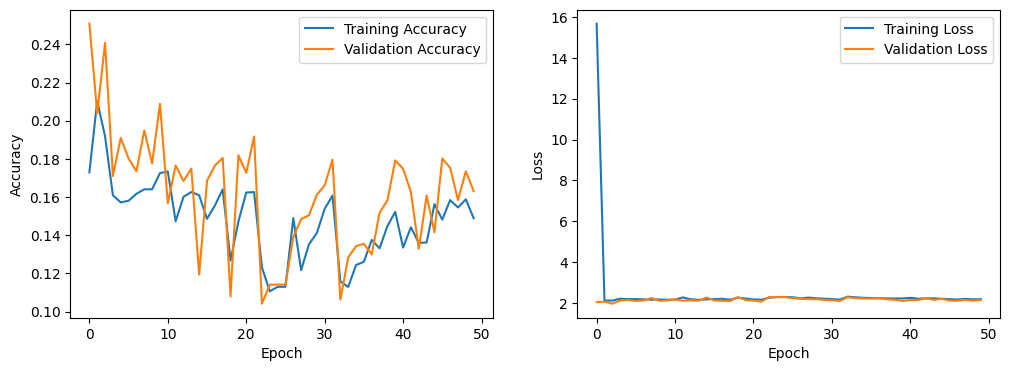

In [137]:
model_3 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])
model_3.compile(optimizer='sgd',  # Using Stochastic Gradient Descent
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_3 = model_3.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

#plotting the configuration 3
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_3.history['accuracy'], label='Training Accuracy')
plt.plot(history_3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_3.history['loss'], label='Training Loss')
plt.plot(history_3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

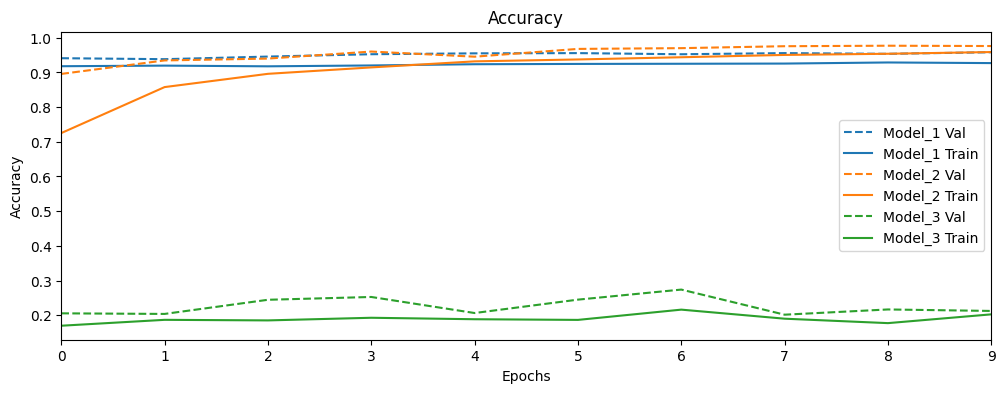

In [123]:
# Comparing All Models
def plot_history(histories, key='accuracy'):
    plt.figure(figsize=(12,4))
    plt.title("Accuracy")
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')


    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])
    plt.show()

plot_history([('model_1', history),
              ('model_2', history_2),
              ('model_3', history_3)], key='accuracy')

In [138]:
y_train

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

# 7.Create a custom test set by capturing your own images, saving them in google drive, and importing them into your notebook.


In [139]:
from PIL import ImageOps

# Load custom images from Google Drive
custom_images = []
custom_labels = []
base_folder_path = '/content/drive/MyDrive/Teaching/TME_6015/Assignment_1'
for folder_name in os.listdir(base_folder_path):
    print(folder_name)
    folder_path = os.path.join(base_folder_path, folder_name)
    print(folder_path)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
          print('filename', filename)
          if filename.endswith('.png') or filename.endswith('.PNG') or filename.endswith('.jpg'):
              # filename= filename.replace('.png',"")
              img_path = os.path.join(folder_path, filename)
              print(img_path)
              img = Image.open(img_path).convert('L')  # convert image to grayscale
              img = img.resize((28, 28))  # resize image to match MNIST data
              # img = img.rotate(-90)
              img = ImageOps.invert(img)

              threshold = 100
              img = img.point(lambda p: p > threshold and 255)
              img_array = np.array(img)
              custom_images.append(img_array)
              custom_labels.append(int(folder_name))  # use folder name as label
              print("Cs",custom_labels)

# Convert the list of custom images and labels to numpy arrays
custom_images = np.array(custom_images)
custom_labels = np.array(custom_labels)

# Preprocess the custom images
custom_images = custom_images / 255.0

1
/content/drive/MyDrive/Teaching/TME_6015/Assignment_1/1
filename IMG_20231006_155526.jpg
/content/drive/MyDrive/Teaching/TME_6015/Assignment_1/1/IMG_20231006_155526.jpg
Cs [1]
filename IMG_20231006_155535.jpg
/content/drive/MyDrive/Teaching/TME_6015/Assignment_1/1/IMG_20231006_155535.jpg
Cs [1, 1]
0
/content/drive/MyDrive/Teaching/TME_6015/Assignment_1/0
filename IMG_20231006_135541.jpg
/content/drive/MyDrive/Teaching/TME_6015/Assignment_1/0/IMG_20231006_135541.jpg
Cs [1, 1, 0]
filename IMG_20231006_135547.jpg
/content/drive/MyDrive/Teaching/TME_6015/Assignment_1/0/IMG_20231006_135547.jpg
Cs [1, 1, 0, 0]
filename IMG_20231006_135545.jpg
/content/drive/MyDrive/Teaching/TME_6015/Assignment_1/0/IMG_20231006_135545.jpg
Cs [1, 1, 0, 0, 0]
2
/content/drive/MyDrive/Teaching/TME_6015/Assignment_1/2
filename IMG_20231006_135608.jpg
/content/drive/MyDrive/Teaching/TME_6015/Assignment_1/2/IMG_20231006_135608.jpg
Cs [1, 1, 0, 0, 0, 2]
3
/content/drive/MyDrive/Teaching/TME_6015/Assignment_1/3
fil

In [140]:
custom_labels

array([1, 1, 0, 0, 0, 2, 3, 4, 5, 6, 8, 7, 9])

In [141]:
display_image = custom_images[1] * 255

# Convert the image data to uint8
display_image = display_image.astype(np.uint8)

# Create a PIL image
img = Image.fromarray(display_image)

# Display the image
img

# 8.Generate classifications for your custom test set and report on the performance.

In [147]:
test_loss, test_acc = model_2.evaluate(custom_images, custom_labels, verbose=2)
print("Test Accuracy:", test_acc)

1/1 - 0s - loss: 2.5938 - accuracy: 0.0769 - 20ms/epoch - 20ms/step
Test Accuracy: 0.07692307978868484
